## Excercise (15.17): Binary Classification with the Breast Cancer Dataset
* Check out the **[Breast Cancer Wisconsin Diagnostic dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html?highlight=breast%20cancer)** that's bundled with scikit-learn.
* The dataset contains 569 samples, each with 30 features and a label indicating whether a tumor was malignant (0) or benign (1). There are only two labels, so this dataset is comonly used to perform **binary classification**. Using this dataset, reimplement the steps of this chapter's classification case study in Sections 15.2-15.3. Use the GausianNB (short for Gaussian Naive Bayes) estimator. When you execute multiple classifiers (as in Section 15.3.3) to determine which one is best for the Breast Cancer Wisconsin Diagnostic dataset, include a **LogisticRegression** classifier in the estimators dictionary. Logistic regression is another popular algorithm for binary classification.

In [7]:
import numpy as np
import pandas as pd 
import sklearn as sk
from sklearn.datasets import load_breast_cancer

## Load data

In [25]:
data = load_breast_cancer(as_frame=True)
print(data.keys())
df = data["frame"]

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [20]:
data.data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [19]:
data.target

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

## Build Model

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, random_state=42)  # random_state for reproducibility
print(f"shapes: {X_train.shape}, {X_test.shape}, {y_train.shape}, {y_test.shape}")

shapes: (426, 30), (143, 30), (426,), (143,)


In [26]:
from sklearn.ensemble._forest import RandomForestClassifier
rf = RandomForestClassifier()

In [27]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
y_hat = rf.predict(X_test)

Accuracy: 0.965034965034965


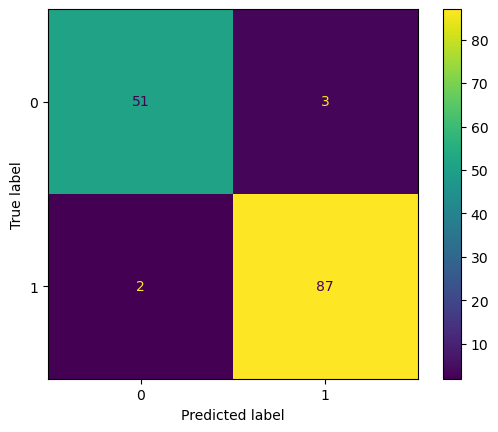

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
conf = confusion_matrix(y_test, y_hat)
print(f"Accuracy: {accuracy_score(y_test, y_hat)}")
ConfusionMatrixDisplay(conf).plot()

## TPOT

In [34]:
from tpot import TPOTClassifier
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=3)
pipeline_optimizer.fit(X_train, y_train)

32 operators have been imported by TPOT.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
                                                                             
Generation 1 - Current Pareto front scores:
                                                                             
-1	0.9647606019151848	GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.5, GradientBoostingClassifier__max_depth=4, GradientBoostingClassifier__max_features=0.4, GradientBoostingClassifier__min_samples_leaf=13, GradientBoostingClassifier__min_samples_split=9, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.7500000000000001)
                                                                             
-2	0.9647879616963065	MLPClassifier(RobustScaler(input_matrix), MLPClassifier__alpha=0.0001, MLPClassifier__learning_rate_init=0.01)
_pre_test deco

TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=3)

In [32]:
print(pipeline_optimizer.score(X_test, y_test))

0.965034965034965


In [33]:
# pipeline_optimizer.export('tpot_exported_pipeline.py')